In [2]:
from __future__ import annotations

import os
import fnmatch
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import numpy as np
import pandas as pd

from shapely import wkt
from tqdm import tqdm

from typing import Literal
from h3.constants import DMG_CLASSES_DICT
from h3.utils.directories import get_metadata_pickle_dir

In [12]:
output_dir = "/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/lnglat_pre_pol_post_damage.pkl"
# output_dir = get_metadata_pickle_dir()

df = pd.read_pickle(output_dir)
df.describe()

## Geographical plots

In [4]:
DMG_CLASSES_DICT

{'no-damage': 0,
 'minor-damage': 1,
 'major-damage': 2,
 'destroyed': 3,
 'un-classified': 4}

[10:27:57] ERROR    PROJ: proj_identify: /Users/Lisanne/opt/anaconda3/envs/gtc/share/proj/proj.db ]8;id=940186;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/fiona/collection.py\collection.py]8;;\:]8;id=937997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/fiona/collection.py#222\222]8;;\
                    lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata.                  
                    It comes from another PROJ installation.                                                       

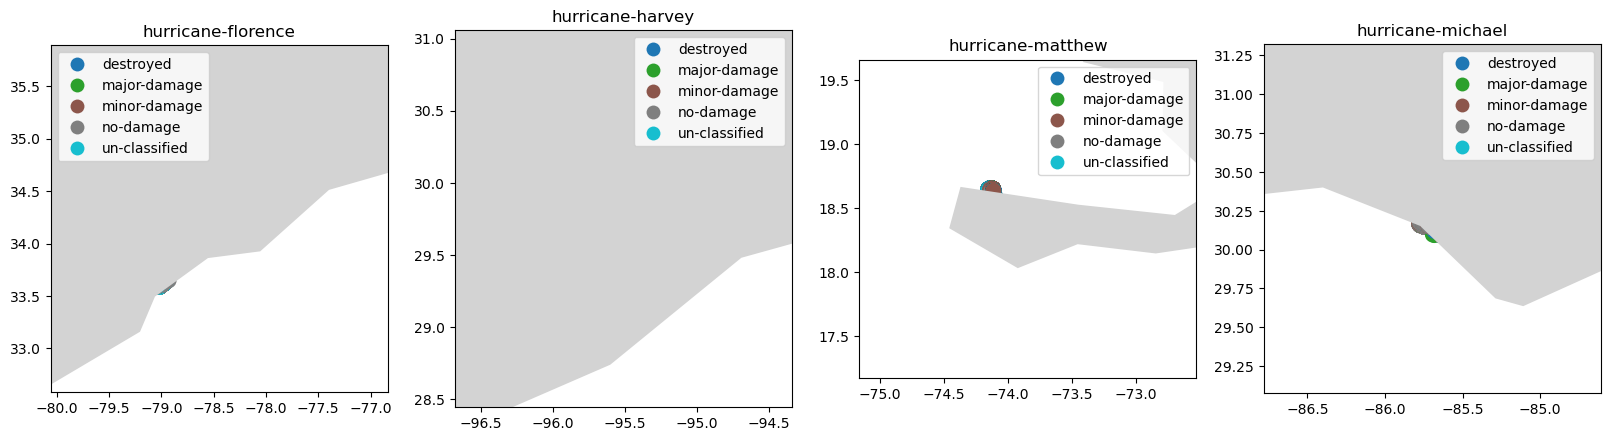

In [53]:
num_disasters = df['disaster_name'].unique()

dict2 = {v : k for k, v in DMG_CLASSES_DICT.items()}
df["damage_categorical"] = df["damage_class"].replace(dict2)

# use geopandas dataset for world map
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

figs, axs = plt.subplots(1, len(num_disasters), figsize = (20,10))

for name, ax in zip(num_disasters, axs.ravel()):
  filtered_df = df[df['disaster_name'] == name]
  filtered_df.plot(ax=ax, column = "damage_categorical", legend = True, s=100, categorical = True)
  
  
  ax.set_title(name)
 # ax.get_legend().remove()
  minx, miny, maxx, maxy = filtered_df.total_bounds
  countries.plot(color="lightgrey", ax=ax)
  ax.set_xlim(minx-1, maxx+1)
  ax.set_ylim(miny-1, maxy+1)
  ax.set_xlabel("")

<AxesSubplot:>

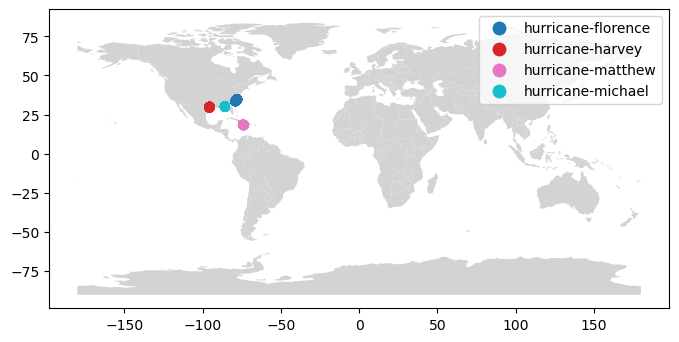

In [58]:
fig, ax = plt.subplots(figsize=(8,6))

countries.plot(color="lightgrey", ax=ax)
df.plot(column = 'disaster_name',  ax=ax, legend = True)

(13.175732858364004, 39.89245961357054)

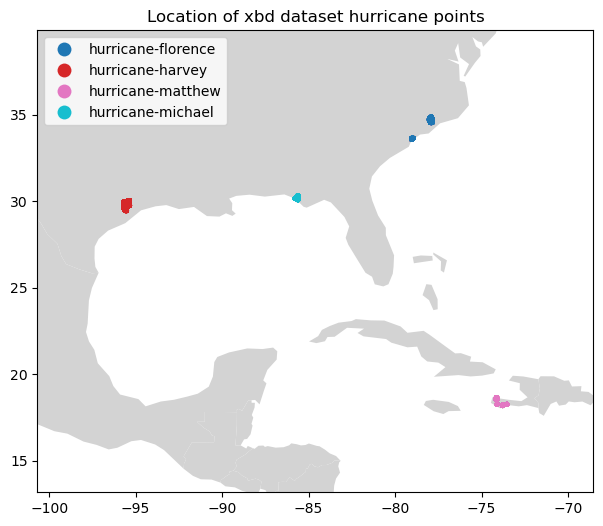

In [59]:
minx, miny, maxx, maxy = df.total_bounds

fig, ax = plt.subplots(figsize=(8,6))

countries.plot(color="lightgrey", ax=ax)
df.plot(column = 'disaster_name',  ax=ax, legend = True, s = 5)
ax.set_title("Location of xbd dataset hurricane points") # for only part a
ax.set_xlim(minx-5, maxx+5)
ax.set_ylim(miny-5, maxy+5)

## Damage exploration plots

array([[<AxesSubplot:title={'center':'hurricane-florence'}>,
        <AxesSubplot:title={'center':'hurricane-harvey'}>],
       [<AxesSubplot:title={'center':'hurricane-matthew'}>,
        <AxesSubplot:title={'center':'hurricane-michael'}>]], dtype=object)

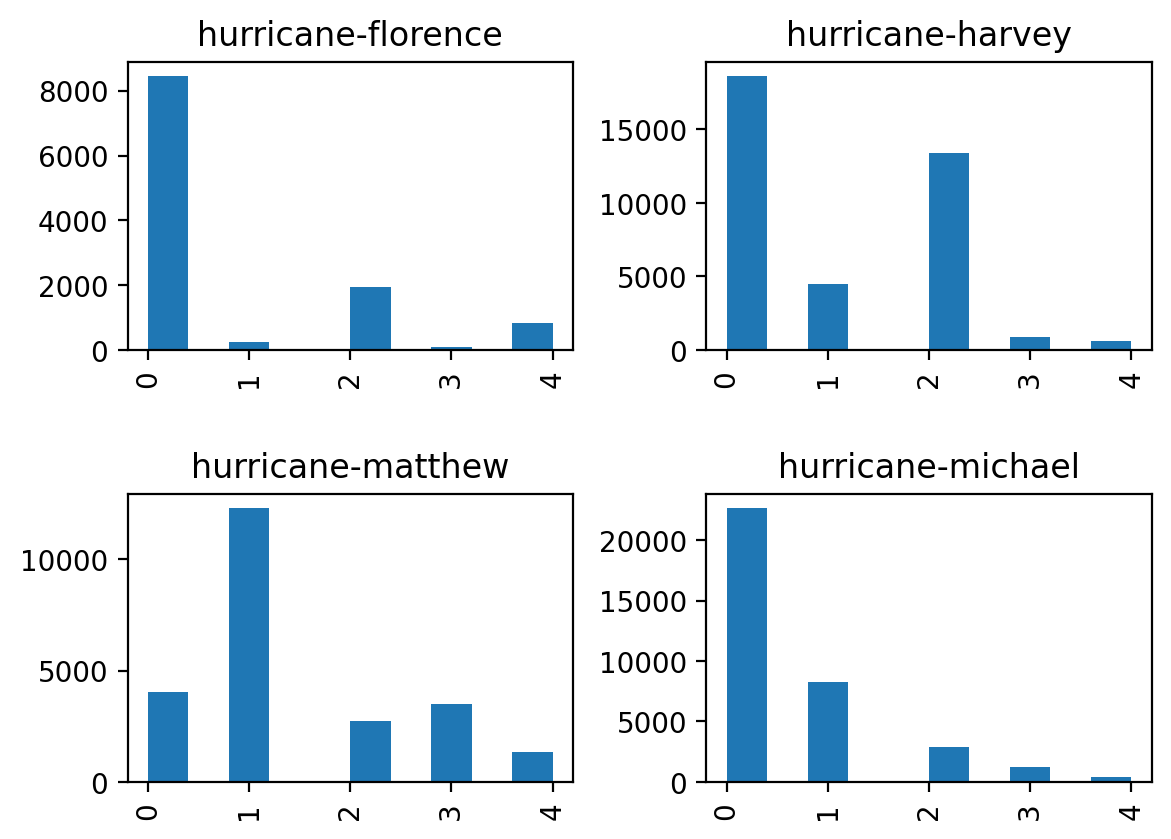

In [131]:
# using matplotlib
df["damage_class"].hist(by=df["disaster_name"])

AttributeError: 'FacetGrid' object has no attribute 'get_yticklabels'

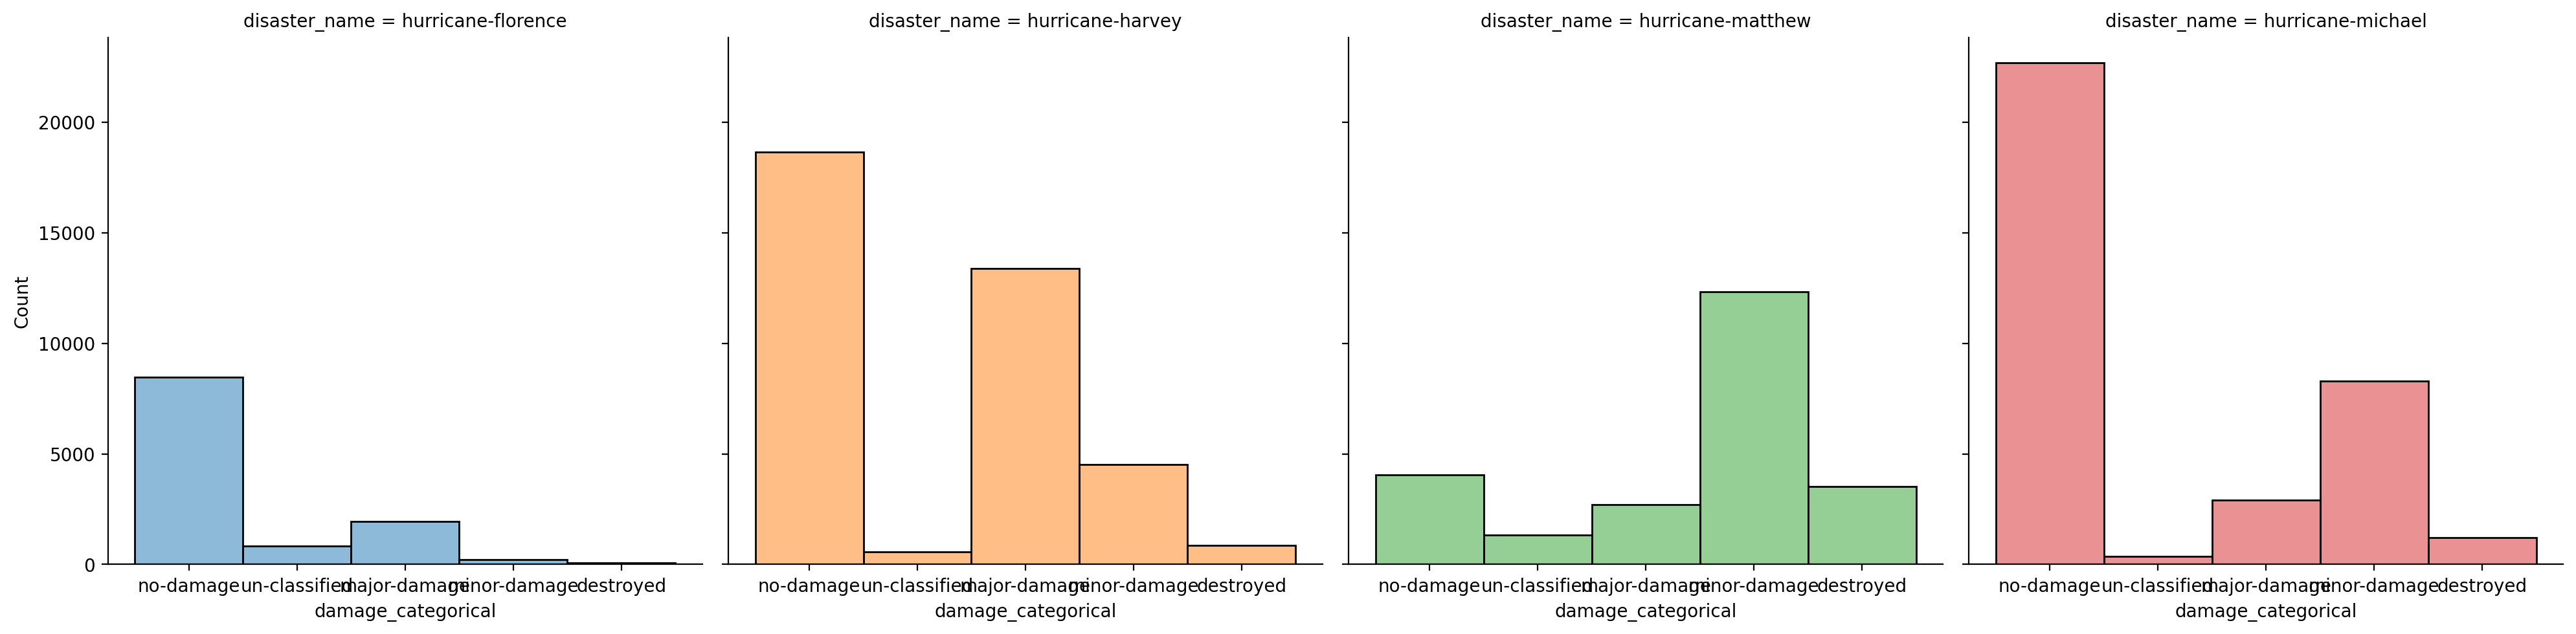

In [120]:
# using seaborn
plot = sns.displot(data=df, x="damage_categorical", hue="disaster_name", col="disaster_name", legend=False)
plot.set_xticklabels(plot.get_yticklabels(), rotation=45)

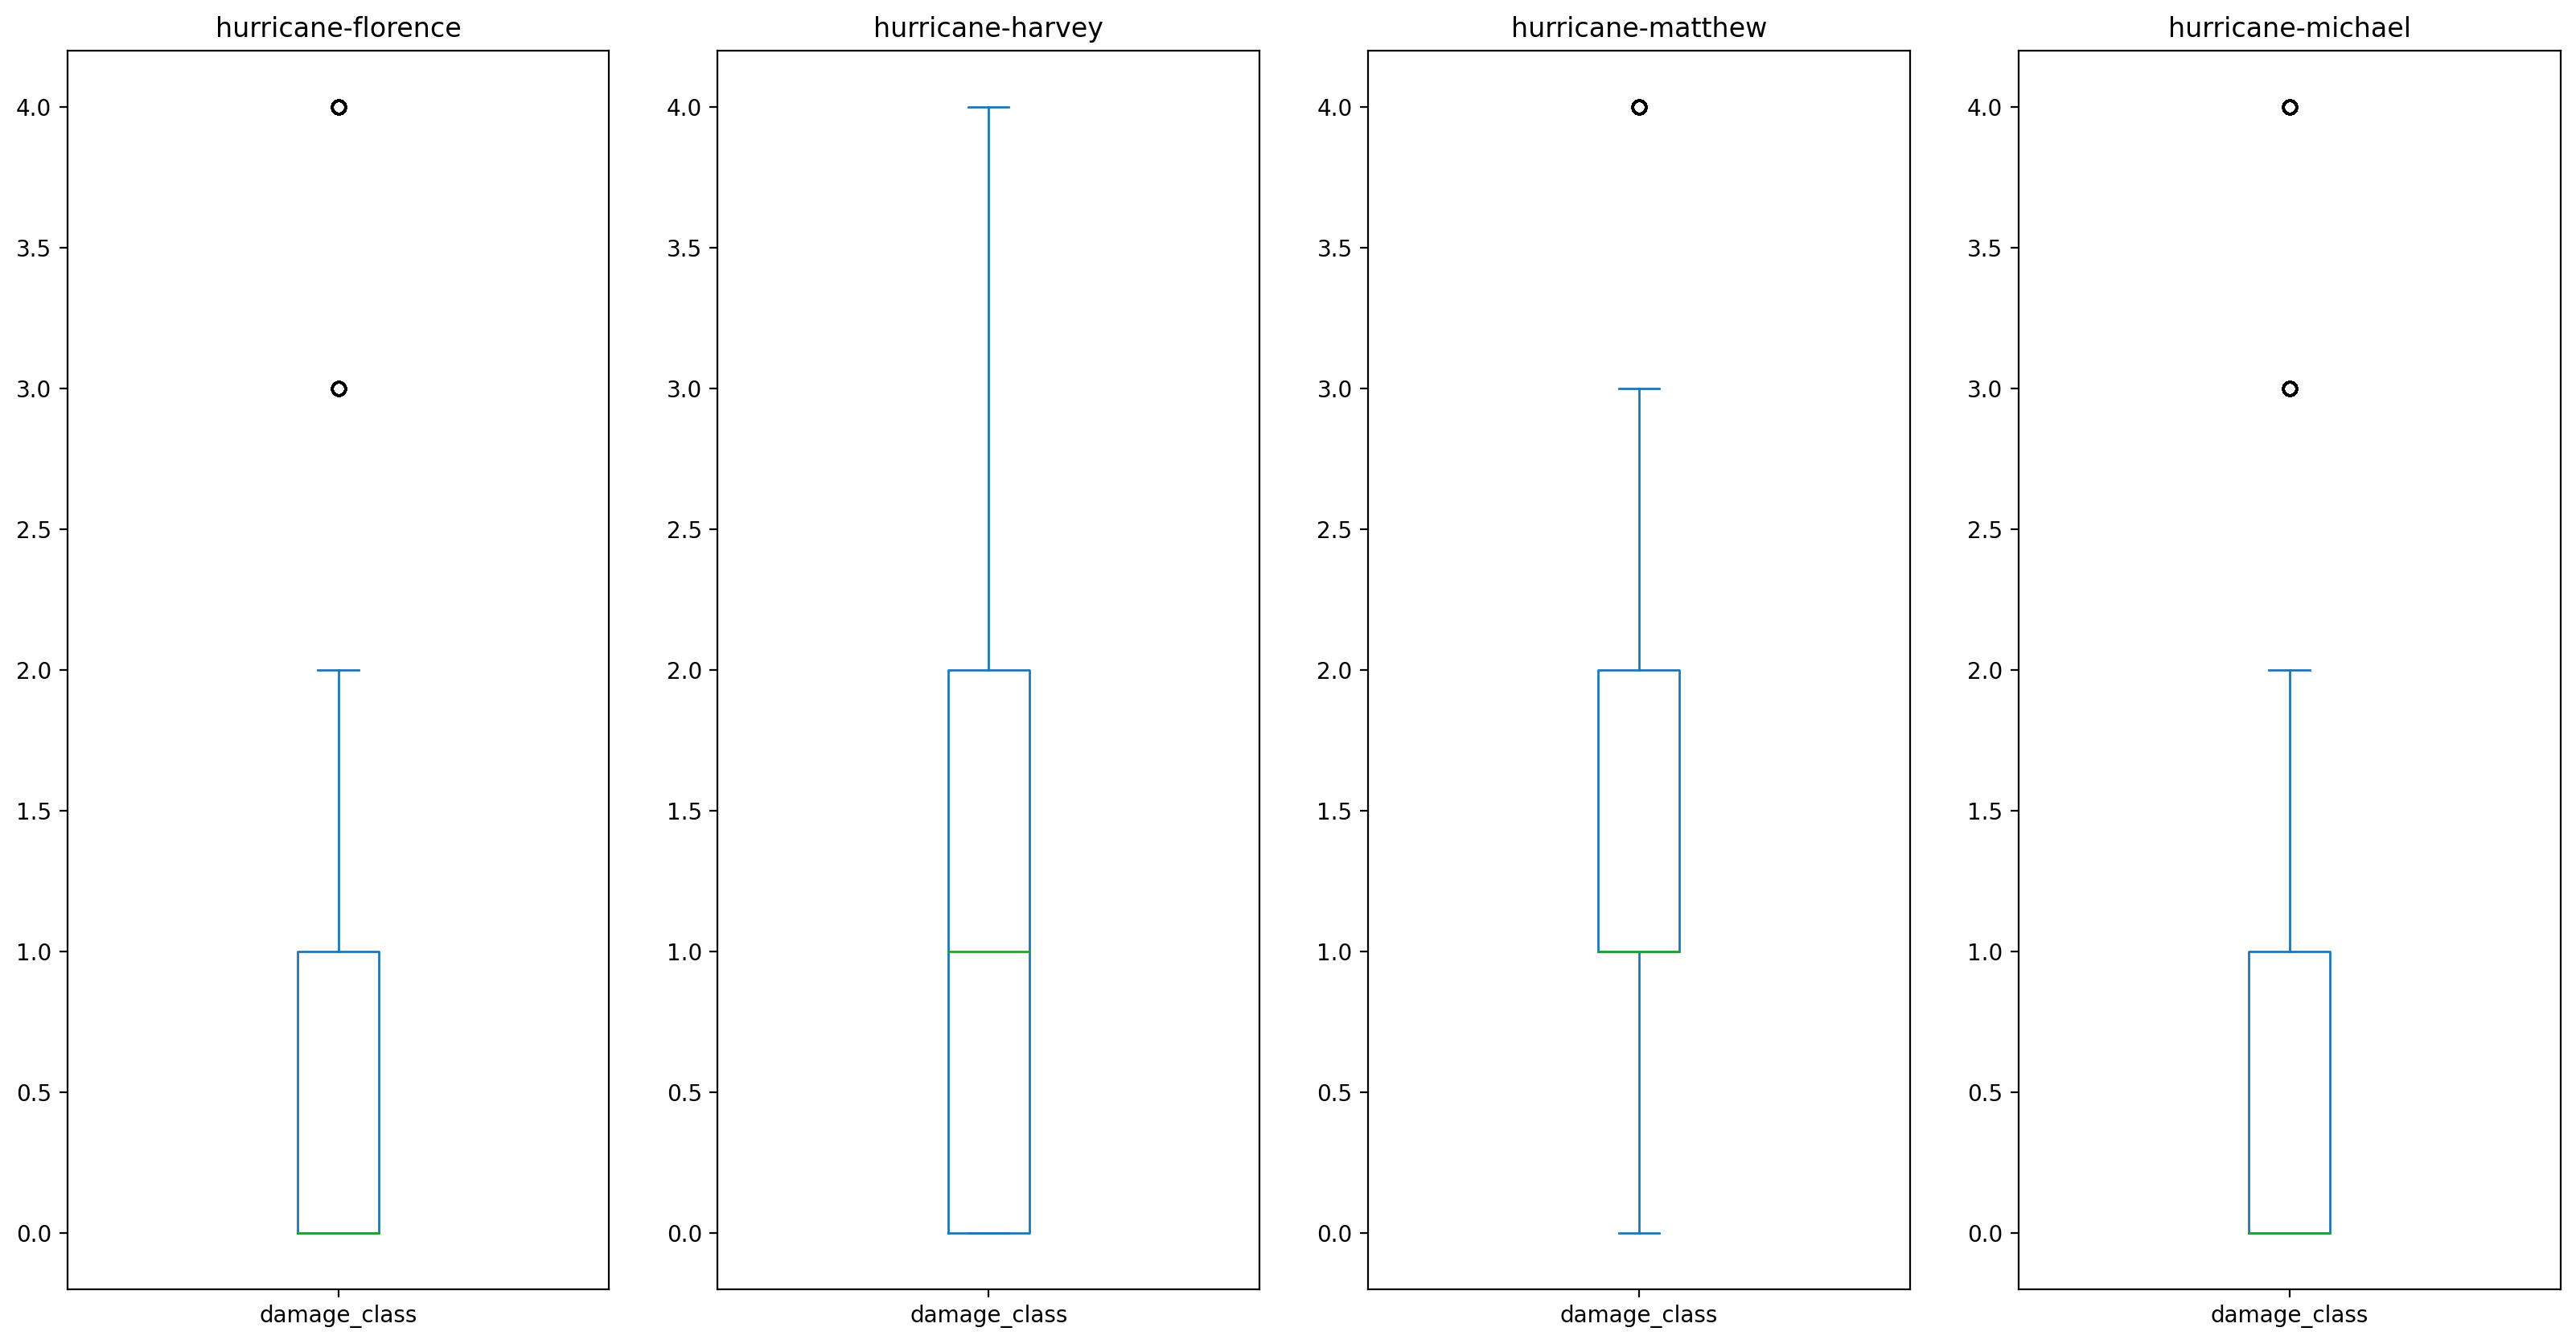

In [122]:
figs, axs = plt.subplots(1, len(num_disasters), figsize = (20,10))

for name, ax in zip(num_disasters, axs.ravel()):
  filtered_df = df[df['disaster_name'] == name]
  filtered_df["damage_class"].plot(kind='box', ax=ax)
  ax.set_title(name)

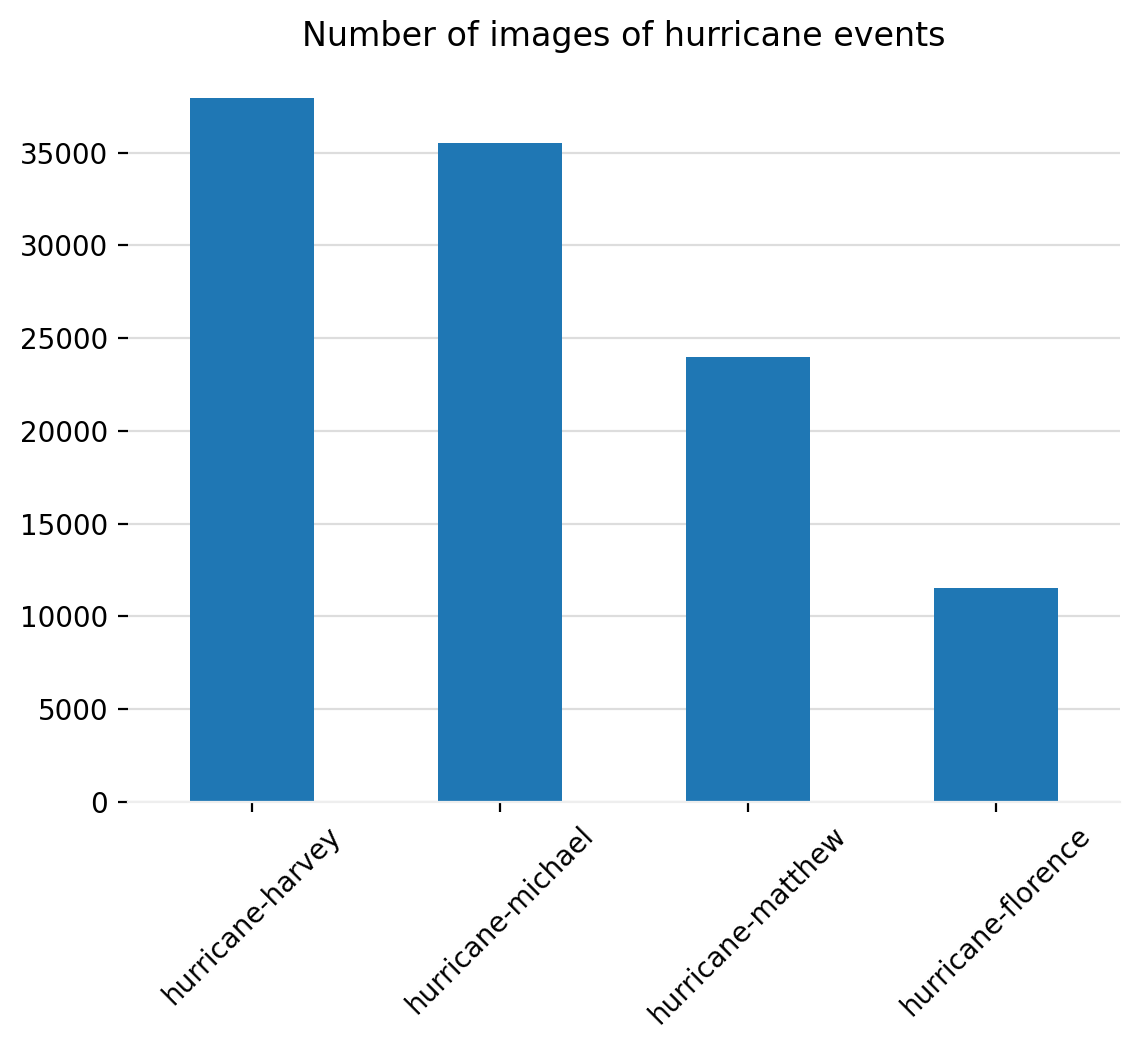

In [124]:
value_counts = df.disaster_name.value_counts()
ax = value_counts.plot(kind='bar')

plt.title("Number of images of hurricane events")
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#DDDDDD')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.xaxis.grid(False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#EEEEEE')


plt.show()

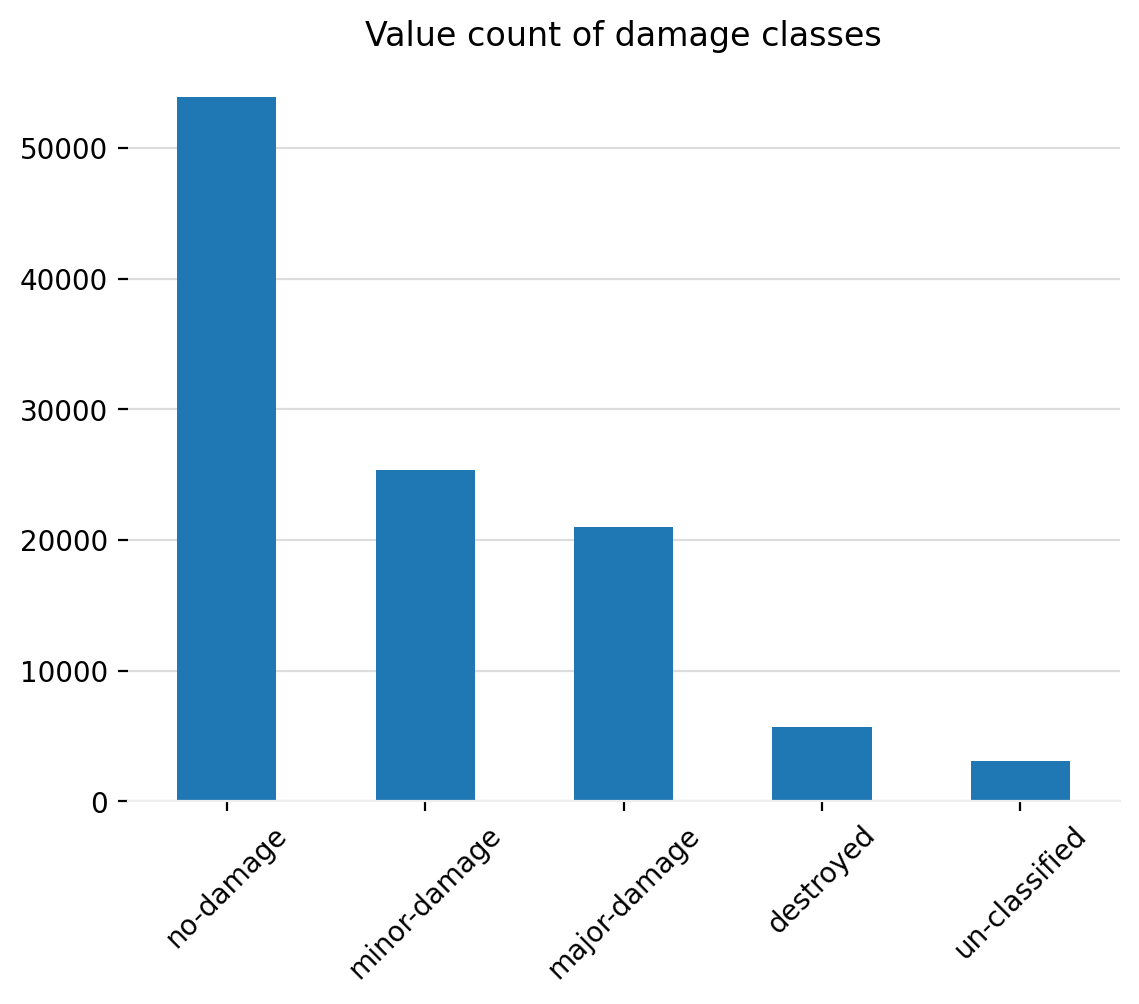

In [112]:
value_counts = df.damage_categorical.value_counts()
ax = value_counts.plot(kind='bar')

plt.title("Value count of damage classes")
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#DDDDDD')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.xaxis.grid(False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#EEEEEE')


plt.show()


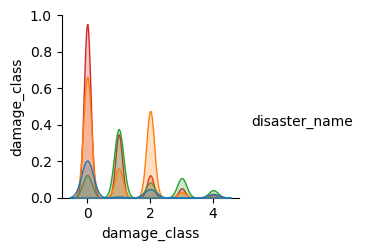

In [64]:
sns.pairplot(data=df, hue="disaster_name")